<a href="https://colab.research.google.com/github/FernandaSzAdr/KNN_cromossome/blob/master/TesteRedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.4 GB  | Proc size: 665.3 MB
GPU RAM Free: 11325MB | Used: 116MB | Util   1% | Total 11441MB


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
train_path = 'drive/My Drive/Base_CNN/Train'
test_path = 'drive/My Drive/Base_CNN/Test'
validation_path = 'drive/My Drive/Base_CNN/Validation'



---



## Implementação



*   Batch size = 32
*   Image size = 120x120



In [0]:
results = {}

In [0]:
bSize = 32

In [0]:
datagen = ImageDataGenerator(rescale=1/255.)

In [0]:
train_batches = datagen.flow_from_directory(train_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)
test_batches = datagen.flow_from_directory(test_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)
validation_batches = datagen.flow_from_directory(validation_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)

Found 4810 images belonging to 2 classes.
Found 1336 images belonging to 2 classes.
Found 534 images belonging to 2 classes.


In [0]:
stepsPerEpoche = len(train_batches)/bSize
validationSteps = len(validation_batches)/bSize

In [0]:
test_batches.class_indices

{'C': 0, 'NC': 1}



---



### 1 tentativa


**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"



In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(1024, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_1.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 67s - loss: 0.7149 - acc: 0.4813 - val_loss: 0.6964 - val_acc: 0.4375

Epoch 00001: val_loss improved from inf to 0.69639, saving model to weights_architecture_1.hdf5
Epoch 2/50
 - 65s - loss: 0.6992 - acc: 0.4875 - val_loss: 0.7075 - val_acc: 0.5000

Epoch 00002: val_loss did not improve from 0.69639
Epoch 3/50
 - 58s - loss: 0.6870 - acc: 0.5625 - val_loss: 0.7056 - val_acc: 0.3125

Epoch 00003: val_loss did not improve from 0.69639
Epoch 4/50
 - 57s - loss: 0.7081 - acc: 0.4750 - val_loss: 0.7215 - val_acc: 0.5000

Epoch 00004: val_loss did not improve from 0.69639
Epoch 5/50
 - 62s - loss: 0.6913 - acc: 0.5438 - val_loss: 0.7009 - val_acc: 0.5000

Epoch 00005: val_loss did not improve from 0.69639
Epoch 6/50
 - 68s - loss: 0.6891 - acc: 0.5438 - val_loss: 0.7077 - val_acc: 0.4688

Epoch 00006: val_loss did not improve from 0.69639
Epoch 7/50
 - 65s - loss: 0.7034 - acc: 0.4937 - val_loss: 0.7093 - val_acc: 0.4375

Epoch 00007: val_loss did not improve from 0.69639
Epo

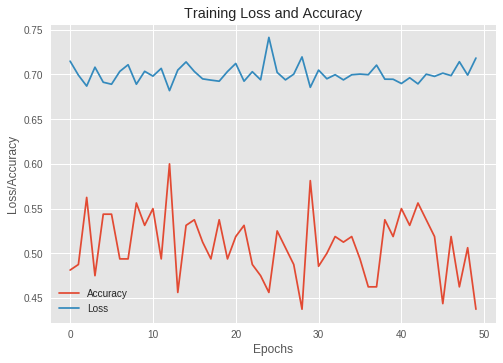

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_1.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_1.hdf5')

In [0]:
results['architecture_1'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 96ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_1'][0], 100 * results['architecture_1'][1]))

Test Loss: 0.7104545029129569 | Test Accuracy: 50.39%




---



### 2 tentativa

**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"
*   Alteração nas duas ultimas camadas Dense





In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_2.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 2s - loss: 0.6936 - acc: 0.4937 - val_loss: 0.6926 - val_acc: 0.5938

Epoch 00001: val_loss improved from inf to 0.69259, saving model to weights_architecture_2.hdf5
Epoch 2/50
 - 1s - loss: 0.6931 - acc: 0.4937 - val_loss: 0.6914 - val_acc: 0.6562

Epoch 00002: val_loss improved from 0.69259 to 0.69138, saving model to weights_architecture_2.hdf5
Epoch 3/50
 - 1s - loss: 0.6918 - acc: 0.6500 - val_loss: 0.6914 - val_acc: 0.5938

Epoch 00003: val_loss did not improve from 0.69138
Epoch 4/50
 - 1s - loss: 0.6911 - acc: 0.7250 - val_loss: 0.6917 - val_acc: 0.7812

Epoch 00004: val_loss did not improve from 0.69138
Epoch 5/50
 - 1s - loss: 0.6899 - acc: 0.7188 - val_loss: 0.6900 - val_acc: 0.5938

Epoch 00005: val_loss improved from 0.69138 to 0.68996, saving model to weights_architecture_2.hdf5
Epoch 6/50
 - 1s - loss: 0.6886 - acc: 0.7562 - val_loss: 0.6914 - val_acc: 0.5625

Epoch 00006: val_loss did not improve from 0.68996
Epoch 7/50
 - 1s - loss: 0.6888 - acc: 0.6875 -

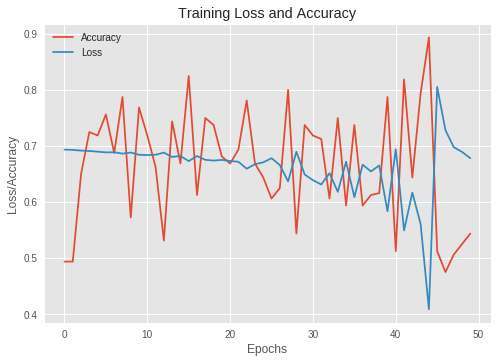

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_2.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_2.hdf5')

In [0]:
results['architecture_2'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 4s 111ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_2'][0], 100 * results['architecture_2'][1]))

Test Loss: 0.5513530415812815 | Test Accuracy: 87.30%


### 3 tentativa

Modelo criado pelo **Lucas Valentim**

https://github.com/lucasvalentim/chromosome-recognizer/blob/master/chromosome_recognizer.ipynb

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_3.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 1.2343 - acc: 0.5500 - val_loss: 0.5575 - val_acc: 0.8125

Epoch 00001: val_loss improved from inf to 0.55752, saving model to weights_architecture_3.hdf5
Epoch 2/50
 - 0s - loss: 0.7688 - acc: 0.7250 - val_loss: 0.5724 - val_acc: 0.8125

Epoch 00002: val_loss did not improve from 0.55752
Epoch 3/50
 - 0s - loss: 0.5285 - acc: 0.8000 - val_loss: 0.5969 - val_acc: 0.7656

Epoch 00003: val_loss did not improve from 0.55752
Epoch 4/50
 - 0s - loss: 0.4802 - acc: 0.8469 - val_loss: 0.3248 - val_acc: 0.9219

Epoch 00004: val_loss improved from 0.55752 to 0.32484, saving model to weights_architecture_3.hdf5
Epoch 5/50
 - 0s - loss: 0.6265 - acc: 0.7844 - val_loss: 0.4608 - val_acc: 0.8125

Epoch 00005: val_loss did not improve from 0.32484
Epoch 6/50
 - 0s - loss: 0.3263 - acc: 0.8781 - val_loss: 0.5143 - val_acc: 0.7344

Epoch 00006: val_loss did not improve from 0.32484
Epoch 7/50
 - 0s - loss: 0.4817 - acc: 0.8156 - val_loss: 0.9058 - val_acc: 0.5000

Epoch 00007:

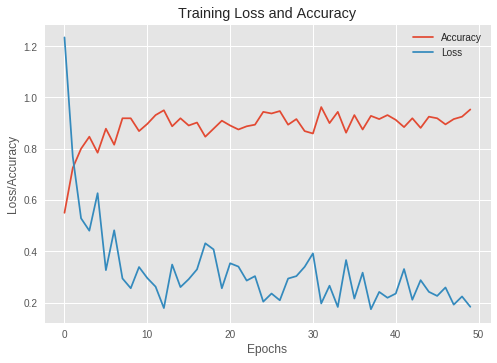

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_3.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_3.hdf5')

In [0]:
results['architecture_3'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 4s 115ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_3'][0], 100 * results['architecture_3'][1]))

Test Loss: 0.32302195443881776 | Test Accuracy: 87.75%


### 4 tentativa

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_4.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 0.4948 - acc: 0.7969 - val_loss: 0.4625 - val_acc: 0.8438

Epoch 00001: val_loss improved from inf to 0.46252, saving model to weights_architecture_4.hdf5
Epoch 2/50
 - 0s - loss: 0.3706 - acc: 0.8563 - val_loss: 0.2746 - val_acc: 0.9219

Epoch 00002: val_loss improved from 0.46252 to 0.27464, saving model to weights_architecture_4.hdf5
Epoch 3/50
 - 0s - loss: 0.3508 - acc: 0.8844 - val_loss: 0.4417 - val_acc: 0.8281

Epoch 00003: val_loss did not improve from 0.27464
Epoch 4/50
 - 0s - loss: 0.3224 - acc: 0.8937 - val_loss: 0.3499 - val_acc: 0.8636

Epoch 00004: val_loss did not improve from 0.27464
Epoch 5/50
 - 0s - loss: 0.3156 - acc: 0.8563 - val_loss: 0.4850 - val_acc: 0.8438

Epoch 00005: val_loss did not improve from 0.27464
Epoch 6/50
 - 0s - loss: 0.2291 - acc: 0.9469 - val_loss: 0.4429 - val_acc: 0.9219

Epoch 00006: val_loss did not improve from 0.27464
Epoch 7/50
 - 0s - loss: 0.3910 - acc: 0.8594 - val_loss: 0.1628 - val_acc: 0.9688

Epoch 00007:

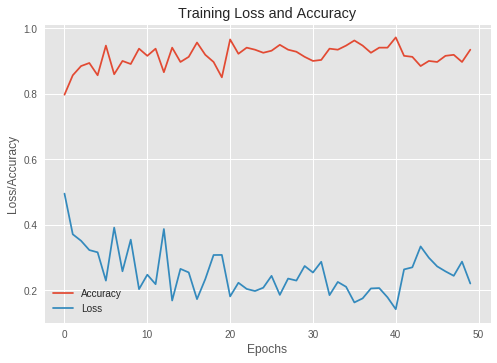

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_4.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_4.hdf5')

In [0]:
results['architecture_4'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 4s 114ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_4'][0], 100 * results['architecture_4'][1]))

Test Loss: 0.4284676597343655 | Test Accuracy: 84.89%


### 5 tentativa

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_5.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 1.2712 - acc: 0.5875 - val_loss: 0.7546 - val_acc: 0.4531

Epoch 00001: val_loss improved from inf to 0.75457, saving model to weights_architecture_5.hdf5
Epoch 2/50
 - 0s - loss: 0.8985 - acc: 0.6156 - val_loss: 0.5960 - val_acc: 0.6719

Epoch 00002: val_loss improved from 0.75457 to 0.59596, saving model to weights_architecture_5.hdf5
Epoch 3/50
 - 0s - loss: 0.8895 - acc: 0.6844 - val_loss: 0.8353 - val_acc: 0.5625

Epoch 00003: val_loss did not improve from 0.59596
Epoch 4/50
 - 0s - loss: 0.6863 - acc: 0.7719 - val_loss: 0.7966 - val_acc: 0.5938

Epoch 00004: val_loss did not improve from 0.59596
Epoch 5/50
 - 0s - loss: 0.5734 - acc: 0.8063 - val_loss: 0.5991 - val_acc: 0.6562

Epoch 00005: val_loss did not improve from 0.59596
Epoch 6/50
 - 0s - loss: 0.4898 - acc: 0.8344 - val_loss: 0.7487 - val_acc: 0.6094

Epoch 00006: val_loss did not improve from 0.59596
Epoch 7/50
 - 0s - loss: 0.6408 - acc: 0.7789 - val_loss: 0.4867 - val_acc: 0.8438

Epoch 00007:

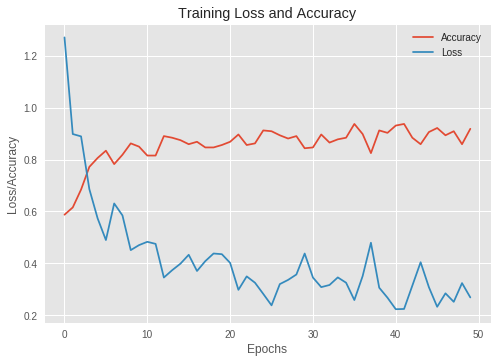

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_5.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_5.hdf5')

In [0]:
results['architecture_5'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 4s 113ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_5'][0], 100 * results['architecture_5'][1]))

Test Loss: 0.3866214484680356 | Test Accuracy: 87.16%


### 6 tentativa

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_6.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 0.6067 - acc: 0.7375 - val_loss: 1.8438 - val_acc: 0.4773

Epoch 00001: val_loss improved from inf to 1.84379, saving model to weights_architecture_6.hdf5
Epoch 2/50
 - 1s - loss: 0.5261 - acc: 0.8063 - val_loss: 1.9166 - val_acc: 0.4531

Epoch 00002: val_loss did not improve from 1.84379
Epoch 3/50
 - 0s - loss: 0.3956 - acc: 0.8281 - val_loss: 1.4849 - val_acc: 0.5156

Epoch 00003: val_loss improved from 1.84379 to 1.48494, saving model to weights_architecture_6.hdf5
Epoch 4/50
 - 0s - loss: 0.3594 - acc: 0.8531 - val_loss: 1.3778 - val_acc: 0.5312

Epoch 00004: val_loss improved from 1.48494 to 1.37784, saving model to weights_architecture_6.hdf5
Epoch 5/50
 - 0s - loss: 0.3125 - acc: 0.9062 - val_loss: 0.6184 - val_acc: 0.6562

Epoch 00005: val_loss improved from 1.37784 to 0.61835, saving model to weights_architecture_6.hdf5
Epoch 6/50
 - 0s - loss: 0.2455 - acc: 0.9281 - val_loss: 1.3630 - val_acc: 0.7031

Epoch 00006: val_loss did not improve from 0.6183

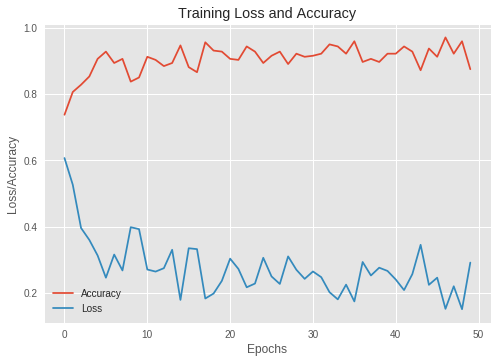

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_6.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_6.hdf5')

In [0]:
results['architecture_6'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 108ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_6'][0], 100 * results['architecture_6'][1]))

Test Loss: 0.19943998718824912 | Test Accuracy: 94.29%


### 7 tentativa

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **Adadelta** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_7.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 105s - loss: 0.5088 - acc: 0.7562 - val_loss: 0.7514 - val_acc: 0.8125

Epoch 00001: val_loss improved from inf to 0.75139, saving model to weights_architecture_7.hdf5
Epoch 2/50
 - 96s - loss: 0.4131 - acc: 0.8594 - val_loss: 0.5286 - val_acc: 0.8125

Epoch 00002: val_loss improved from 0.75139 to 0.52856, saving model to weights_architecture_7.hdf5
Epoch 3/50
 - 96s - loss: 0.4844 - acc: 0.8031 - val_loss: 0.4347 - val_acc: 0.8281

Epoch 00003: val_loss improved from 0.52856 to 0.43468, saving model to weights_architecture_7.hdf5
Epoch 4/50
 - 100s - loss: 0.2983 - acc: 0.8969 - val_loss: 0.5128 - val_acc: 0.8594

Epoch 00004: val_loss did not improve from 0.43468
Epoch 5/50
 - 98s - loss: 0.2387 - acc: 0.9313 - val_loss: 1.2124 - val_acc: 0.7500

Epoch 00005: val_loss did not improve from 0.43468
Epoch 6/50
 - 99s - loss: 0.3415 - acc: 0.8594 - val_loss: 0.3629 - val_acc: 0.9062

Epoch 00006: val_loss improved from 0.43468 to 0.36287, saving model to weights_architectu

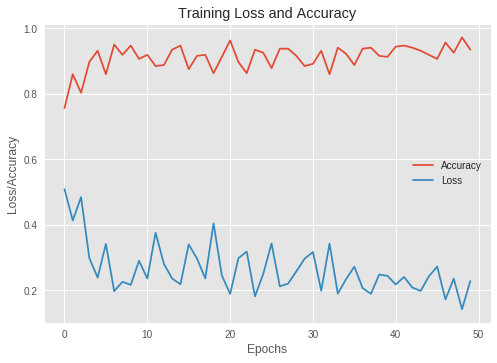

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_7.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_7.hdf5')

In [0]:
results['architecture_7'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 453s 14s/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_7'][0], 100 * results['architecture_7'][1]))

Test Loss: 0.20241341670043766 | Test Accuracy: 94.04%


### 8 tentativa

Modelo adaptado do **Lucas Albertins**

*   Função **Adadelta** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_8.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 1.3220 - acc: 0.5687 - val_loss: 0.5457 - val_acc: 0.7812

Epoch 00001: val_loss improved from inf to 0.54567, saving model to weights_architecture_8.hdf5
Epoch 2/50
 - 1s - loss: 0.8648 - acc: 0.7219 - val_loss: 0.4319 - val_acc: 0.8906

Epoch 00002: val_loss improved from 0.54567 to 0.43193, saving model to weights_architecture_8.hdf5
Epoch 3/50
 - 1s - loss: 0.4733 - acc: 0.8187 - val_loss: 0.9716 - val_acc: 0.5469

Epoch 00003: val_loss did not improve from 0.43193
Epoch 4/50
 - 0s - loss: 0.5483 - acc: 0.8031 - val_loss: 0.9690 - val_acc: 0.5156

Epoch 00004: val_loss did not improve from 0.43193
Epoch 5/50
 - 1s - loss: 0.5059 - acc: 0.8000 - val_loss: 0.6594 - val_acc: 0.6094

Epoch 00005: val_loss did not improve from 0.43193
Epoch 6/50
 - 0s - loss: 0.5445 - acc: 0.8063 - val_loss: 0.9652 - val_acc: 0.5625

Epoch 00006: val_loss did not improve from 0.43193
Epoch 7/50
 - 0s - loss: 0.3193 - acc: 0.8969 - val_loss: 1.4963 - val_acc: 0.4773

Epoch 00007:

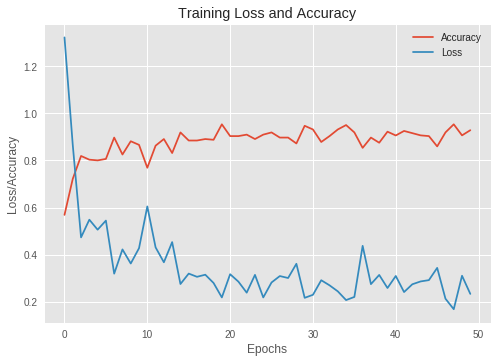

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_8.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_8.hdf5')

In [0]:
results['architecture_8'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 50s 2s/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_8'][0], 100 * results['architecture_8'][1]))

Test Loss: 0.30322768446058035 | Test Accuracy: 89.89%


### 9 tentativa

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_9.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 2.2166 - acc: 0.5062 - val_loss: 0.5331 - val_acc: 0.8438

Epoch 00001: val_loss improved from inf to 0.53314, saving model to weights_architecture_9.hdf5
Epoch 2/50
 - 0s - loss: 0.5364 - acc: 0.7531 - val_loss: 0.4718 - val_acc: 0.8125

Epoch 00002: val_loss improved from 0.53314 to 0.47184, saving model to weights_architecture_9.hdf5
Epoch 3/50
 - 0s - loss: 0.4942 - acc: 0.8312 - val_loss: 0.6131 - val_acc: 0.7031

Epoch 00003: val_loss did not improve from 0.47184
Epoch 4/50
 - 0s - loss: 0.4164 - acc: 0.8563 - val_loss: 0.4350 - val_acc: 0.8750

Epoch 00004: val_loss improved from 0.47184 to 0.43499, saving model to weights_architecture_9.hdf5
Epoch 5/50
 - 0s - loss: 0.5066 - acc: 0.8156 - val_loss: 0.9477 - val_acc: 0.4062

Epoch 00005: val_loss did not improve from 0.43499
Epoch 6/50
 - 0s - loss: 0.4188 - acc: 0.8719 - val_loss: 0.7618 - val_acc: 0.5312

Epoch 00006: val_loss did not improve from 0.43499
Epoch 7/50
 - 0s - loss: 0.3156 - acc: 0.9094 -

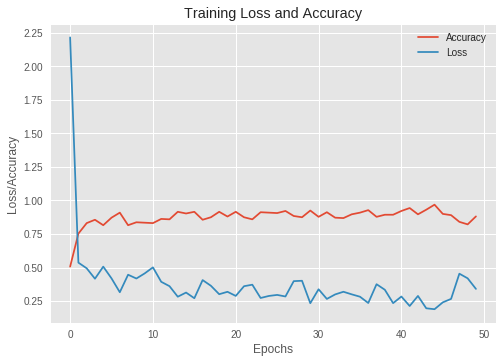

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_9.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_9.hdf5')

In [0]:
results['architecture_9'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 106ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_9'][0], 100 * results['architecture_9'][1]))

Test Loss: 0.3442880939692259 | Test Accuracy: 88.13%


### 10 tentativa

Modelo adaptado do **Lucas Albertins**

*   Função **adam** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_10.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 0.9520 - acc: 0.6594 - val_loss: 0.5854 - val_acc: 0.7188

Epoch 00001: val_loss improved from inf to 0.58536, saving model to weights_architecture_10.hdf5
Epoch 2/50
 - 1s - loss: 0.4780 - acc: 0.8344 - val_loss: 0.5586 - val_acc: 0.7969

Epoch 00002: val_loss improved from 0.58536 to 0.55860, saving model to weights_architecture_10.hdf5
Epoch 3/50
 - 1s - loss: 0.4208 - acc: 0.8563 - val_loss: 0.5534 - val_acc: 0.7188

Epoch 00003: val_loss improved from 0.55860 to 0.55336, saving model to weights_architecture_10.hdf5
Epoch 4/50
 - 1s - loss: 0.4595 - acc: 0.8312 - val_loss: 0.6689 - val_acc: 0.8182

Epoch 00004: val_loss did not improve from 0.55336
Epoch 5/50
 - 1s - loss: 0.5661 - acc: 0.8438 - val_loss: 0.4260 - val_acc: 0.8438

Epoch 00005: val_loss improved from 0.55336 to 0.42604, saving model to weights_architecture_10.hdf5
Epoch 6/50
 - 1s - loss: 0.3732 - acc: 0.8688 - val_loss: 0.2853 - val_acc: 0.8906

Epoch 00006: val_loss improved from 0.42604 t

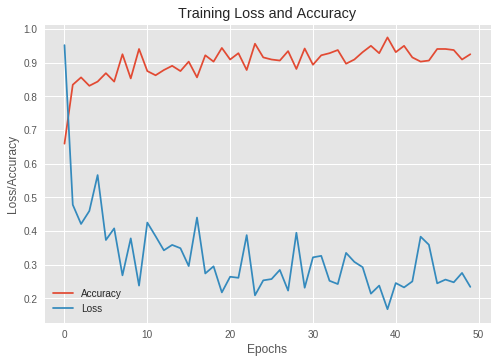

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_10.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_10.hdf5')

In [0]:
results['architecture_10'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 106ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_10'][0], 100 * results['architecture_10'][1]))

Test Loss: 0.27117166738025844 | Test Accuracy: 91.60%


### 11 tentativa

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_11.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 1.2345 - acc: 0.6188 - val_loss: 0.7005 - val_acc: 0.5625

Epoch 00001: val_loss improved from inf to 0.70047, saving model to weights_architecture_11.hdf5
Epoch 2/50
 - 1s - loss: 0.6995 - acc: 0.7562 - val_loss: 0.4903 - val_acc: 0.8906

Epoch 00002: val_loss improved from 0.70047 to 0.49034, saving model to weights_architecture_11.hdf5
Epoch 3/50
 - 1s - loss: 0.6543 - acc: 0.7906 - val_loss: 0.5471 - val_acc: 0.7500

Epoch 00003: val_loss did not improve from 0.49034
Epoch 4/50
 - 1s - loss: 0.5720 - acc: 0.8125 - val_loss: 0.4368 - val_acc: 0.9062

Epoch 00004: val_loss improved from 0.49034 to 0.43685, saving model to weights_architecture_11.hdf5
Epoch 5/50
 - 1s - loss: 0.4690 - acc: 0.8438 - val_loss: 1.2263 - val_acc: 0.6094

Epoch 00005: val_loss did not improve from 0.43685
Epoch 6/50
 - 1s - loss: 0.4698 - acc: 0.8375 - val_loss: 0.5978 - val_acc: 0.6562

Epoch 00006: val_loss did not improve from 0.43685
Epoch 7/50
 - 1s - loss: 0.3687 - acc: 0.890

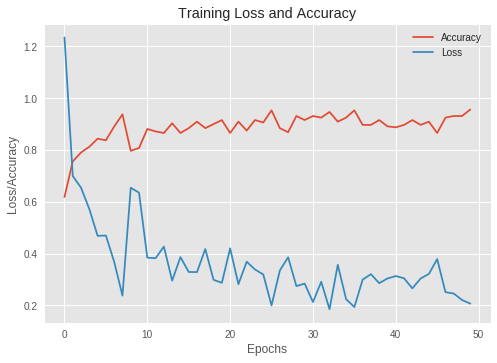

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_11.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_11.hdf5')

In [0]:
results['architecture_11'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 107ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_11'][0], 100 * results['architecture_11'][1]))

Test Loss: 0.28384022461250424 | Test Accuracy: 91.75%


### 12 tentativa

Modelo adaptado do **Lucas Albertins**

*   Sem utilização das funções de regularização
*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_12.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 1.6069 - acc: 0.4719 - val_loss: 0.7831 - val_acc: 0.4318

Epoch 00001: val_loss improved from inf to 0.78306, saving model to weights_architecture_12.hdf5
Epoch 2/50
 - 1s - loss: 0.7505 - acc: 0.6656 - val_loss: 0.7362 - val_acc: 0.6406

Epoch 00002: val_loss improved from 0.78306 to 0.73616, saving model to weights_architecture_12.hdf5
Epoch 3/50
 - 1s - loss: 0.5770 - acc: 0.7844 - val_loss: 0.2476 - val_acc: 0.9219

Epoch 00003: val_loss improved from 0.73616 to 0.24763, saving model to weights_architecture_12.hdf5
Epoch 4/50
 - 1s - loss: 0.5750 - acc: 0.7594 - val_loss: 0.4358 - val_acc: 0.8281

Epoch 00004: val_loss did not improve from 0.24763
Epoch 5/50
 - 1s - loss: 0.3430 - acc: 0.8719 - val_loss: 0.4338 - val_acc: 0.7969

Epoch 00005: val_loss did not improve from 0.24763
Epoch 6/50
 - 1s - loss: 0.4492 - acc: 0.8281 - val_loss: 0.4041 - val_acc: 0.8906

Epoch 00006: val_loss did not improve from 0.24763
Epoch 7/50
 - 1s - loss: 0.3062 - acc: 0.903

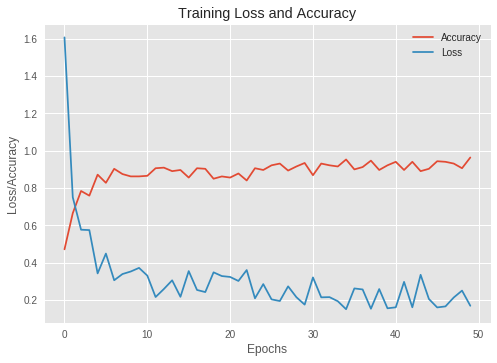

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_12.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_12.hdf5')

In [0]:
results['architecture_12'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 108ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_12'][0], 100 * results['architecture_12'][1]))

Test Loss: 0.24311775481328368 | Test Accuracy: 90.38%


### Graficos

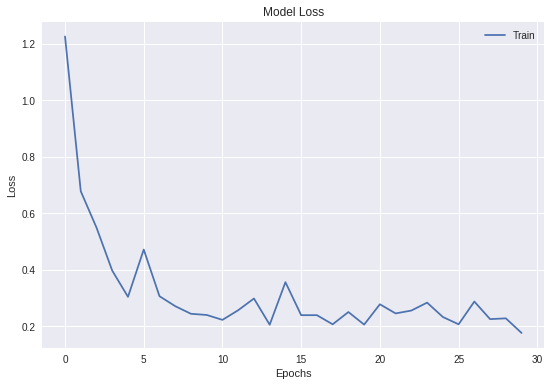

In [0]:
plt.figure(figsize=(9,6))
plt.plot(training.history['loss'], label='Train')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

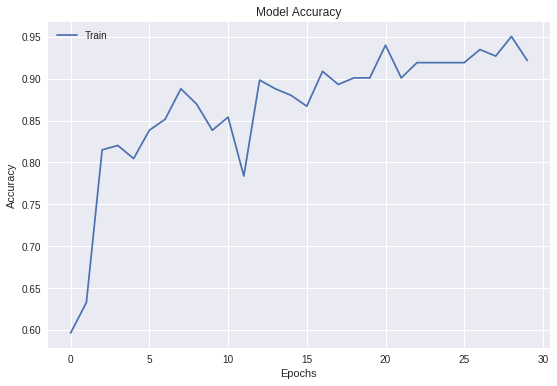

In [0]:
plt.figure(figsize=(9,6))
plt.plot(training.history['acc'], label='Train')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Implementação código do https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8

### 1 Teste

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



---



In [0]:
bSize = 16

In [0]:
datagen = ImageDataGenerator(rescale=1/255.)

In [0]:
train_batches = datagen.flow_from_directory(train_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)
test_batches = datagen.flow_from_directory(test_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)

Found 5344 images belonging to 2 classes.
Found 1336 images belonging to 2 classes.


In [0]:
stepsPerEpoche = len(train_batches)/bSize

In [0]:
model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                    epochs=5, verbose=2)


In [0]:
model.save_weights('25_epochs_exemplo2.h5')

In [0]:
model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                    epochs=50, verbose=2)

Epoch 1/50
 - 2s - loss: 0.7353 - acc: 0.4940
Epoch 2/50
 - 1s - loss: 0.6482 - acc: 0.6443
Epoch 3/50
 - 1s - loss: 0.5639 - acc: 0.7693
Epoch 4/50
 - 1s - loss: 0.5024 - acc: 0.7723
Epoch 5/50
 - 1s - loss: 0.4525 - acc: 0.7812
Epoch 6/50
 - 1s - loss: 0.3668 - acc: 0.8631
Epoch 7/50
 - 1s - loss: 0.3639 - acc: 0.8646
Epoch 8/50
 - 1s - loss: 0.3626 - acc: 0.8586
Epoch 9/50
 - 1s - loss: 0.3493 - acc: 0.8527
Epoch 10/50
 - 1s - loss: 0.2751 - acc: 0.8958
Epoch 11/50
 - 1s - loss: 0.4273 - acc: 0.8646
Epoch 12/50
 - 1s - loss: 0.3008 - acc: 0.9241
Epoch 13/50
 - 1s - loss: 0.3326 - acc: 0.8795
Epoch 14/50
 - 1s - loss: 0.2798 - acc: 0.8824
Epoch 15/50
 - 1s - loss: 0.3081 - acc: 0.8899
Epoch 16/50
 - 1s - loss: 0.3306 - acc: 0.8914
Epoch 17/50
 - 1s - loss: 0.3057 - acc: 0.8810
Epoch 18/50
 - 1s - loss: 0.2491 - acc: 0.9226
Epoch 19/50
 - 1s - loss: 0.2335 - acc: 0.9301
Epoch 20/50
 - 1s - loss: 0.3320 - acc: 0.9077
Epoch 21/50
 - 1s - loss: 0.2576 - acc: 0.9167
Epoch 22/50
 - 1s - lo

In [0]:
model.save_weights('50_epochs_exemplo2.h5')